In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt

from astropy import units as u
from astropy import constants as c

# Problem 2 Computations

In [2]:
def flux(d, n=1):
    const = (c.L_sun / (4*np.pi)).to(u.erg/u.s)
    return n * const * d**-2

def mag(f0, w0, *args, **kwargs):
    f = flux(*args, **kwargs) / w0
    return -2.5*np.log10(f/f0)

def Mag(m, d):
    return m - 5*np.log10(d/(10*u.pc))

In [3]:
# problem a
m_a = mag(f0=3630*1e-12*u.erg/(u.s*u.cm**2*u.AA), w0=5450*u.AA, d=8000*u.pc)
M_a = Mag(m_a, 8000*u.pc)

print(f"m_V = {m_a}\nM_V = {M_a}")

m_V = 18.993555316645523
M_V = 4.478105381685804


In [4]:
# problem b
m_a = mag(f0=3630*1e-12*u.erg/(u.s*u.cm**2*u.AA), w0=5450*u.AA, d=1*u.Mpc, n=1e11)
M_a = Mag(m_a, 1*u.Mpc)

print(f"m_V = {m_a}\nM_V = {M_a}")

m_V = 1.9781053816858045
M_V = -23.021894618314196


# Problem 3 Computations

In [5]:
10**(12/5)

251.18864315095797

# Problem 4 Computations

### (a)

In [6]:
M_G = 4.67
zfactor = 10**(0.4*M_G) * 10**(-15*0.4)
zfactor

7.379042301291011e-05

In [7]:
zfactor**2

5.445026528424214e-09

In [8]:
coeff2 = zfactor*800
coeff2

0.05903233841032809

In [9]:
coeff4 = 30*zfactor**2

coeff4

1.6335079585272643e-07

In [10]:
coeff0 = 40 - (25/0.527)**2
coeff0

-2210.395169391745

In [11]:
d = np.roots([coeff4, 0, coeff2, 0, coeff0])*10
d

array([-7.68274333e-13+6289.59405273j, -7.68274333e-13-6289.59405273j,
       -1.84948885e+03   +0.j        ,  1.84948885e+03   +0.j        ])

In [12]:
unc = (25*u.uarcsec * (1.85e3*u.pc)**2).to(u.pc**2 * u.arcsec)
unc.to(u.pc**2*u.arcsec)

<Quantity 85.5625 pc2 arcsec>

In [13]:
(100*(unc / (d[-1]*u.pc)))

<Quantity 4.62627822+0.j arcsec pc>

### (b)

In [14]:
M_G = -3.3
m_G = M_G + 5*np.log10(50e3/10)
m_G

15.194850021680093

In [15]:
z = 10**(0.4*(m_G-15))
z

1.1965752308065947

In [16]:
T = 0.527
T*(40 + 800*z + 30*z**2)**0.5

16.996987409248124

In [17]:
0.27*17.0

4.59

In [18]:
sigma_floor = 0.12
a = 1
b = 2
G_rvs0 = 14

sigma_floor + b*np.exp(a*(m_G - G_rvs0))

6.726124691219922

In [19]:
6.72*60

403.2

In [20]:
def sigma_vt(d, mu, sigma_varpi, varpi, sigma_mu):
    return 4.74 * d/(u.pc) * mu/(u.arcsec/u.yr) * np.sqrt((sigma_varpi/varpi)**2 + (sigma_mu/mu)**2) * u.km/u.s

sigma_vt(50*u.kpc, 9.48e-5*u.arcsec/u.yr, 17*u.uarcsec, 2e-5*u.arcsec, 4.59*u.uarcsec/u.yr).to(u.km/u.hr)

<Quantity 68862.30267123 km / h>

In [21]:
(4.74 * 50*u.kpc/(u.pc) * 9.48e-5*u.arcsec/u.yr/(u.arcsec/u.yr) * u.km/u.s).to(u.km/u.hr)

<Quantity 80883.36 km / h>

# Question 6 Calculations

In [22]:
1/0.546

1.8315018315018314

In [23]:
4.74 * (10.34) * (1000) * (1.832) / 1000

89.7892512

In [24]:
np.sqrt((-108)**2 + 89.79**2)

140.45014809532955

In [25]:
(np.arctan(89.79/-108)*u.rad).to(u.deg)

<Quantity -39.73975893 deg>

Text(0.5, 0, 'Time [yr]')

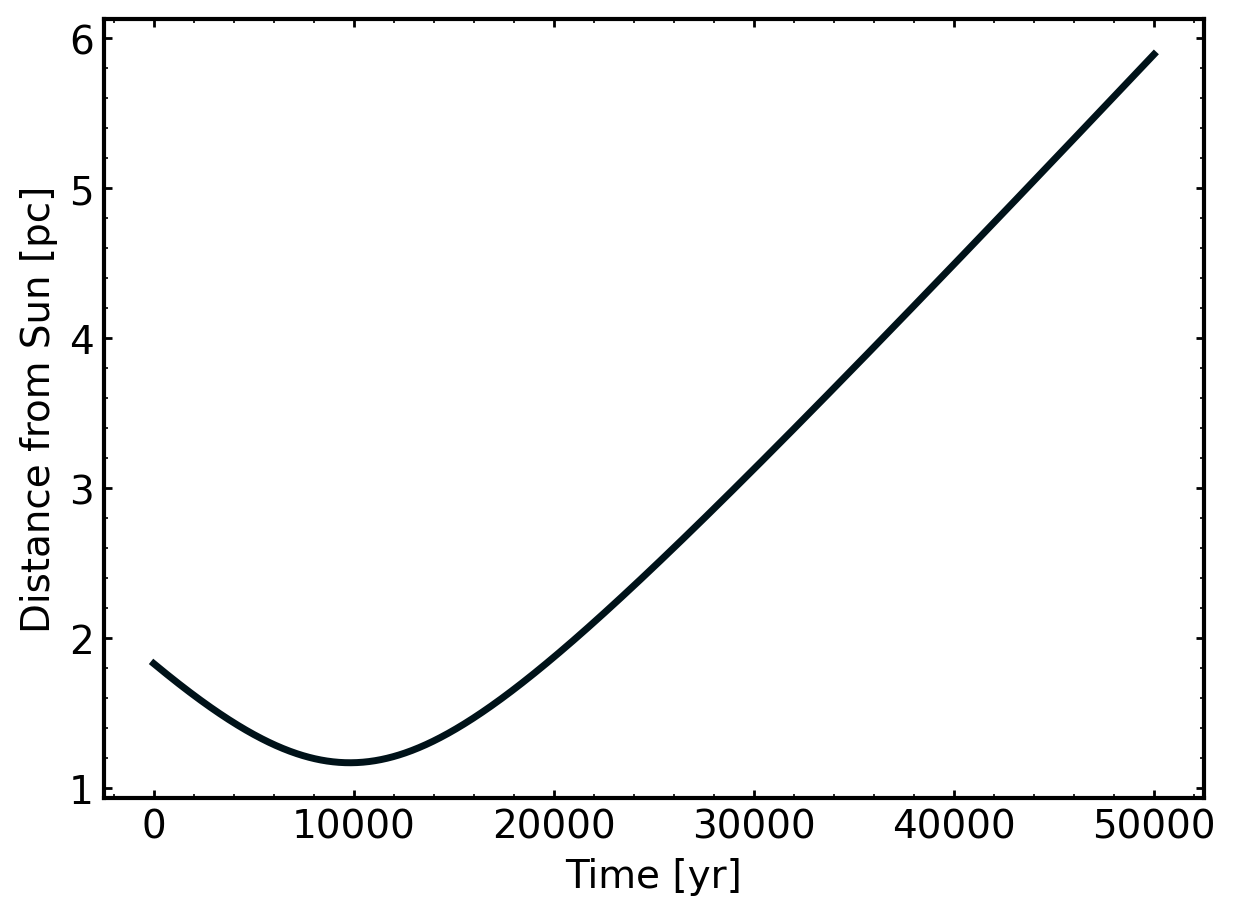

In [26]:
def r(t, v_s=140.45*u.km/u.s, v_r=-108*u.km/u.s, d=1.832*u.pc):
    if not isinstance(t, u.Quantity):
        t *= u.yr
    return (
        (t**2 * v_s**2 + 2*v_r*t*d + d**2)**0.5
    ).to(u.pc)

ts = np.linspace(0, 5e4, int(1e3)) * u.yr

plt.plot(ts, r(ts))
plt.ylabel('Distance from Sun [pc]')
plt.xlabel('Time [yr]')

In [27]:
from scipy.optimize import minimize

res = minimize(r, 30_000*u.yr, tol=1e-100)

res.nit

5

In [28]:
res

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 1.17119869028777
        x: [ 9.808e+03]
      nit: 5
      jac: [ 0.000e+00]
 hess_inv: [[ 5.701e+07]]
     nfev: 44
     njev: 22

In [29]:
9.54 + 5*np.log10(1.171/1.832)

8.568157128702657

# Problem 5

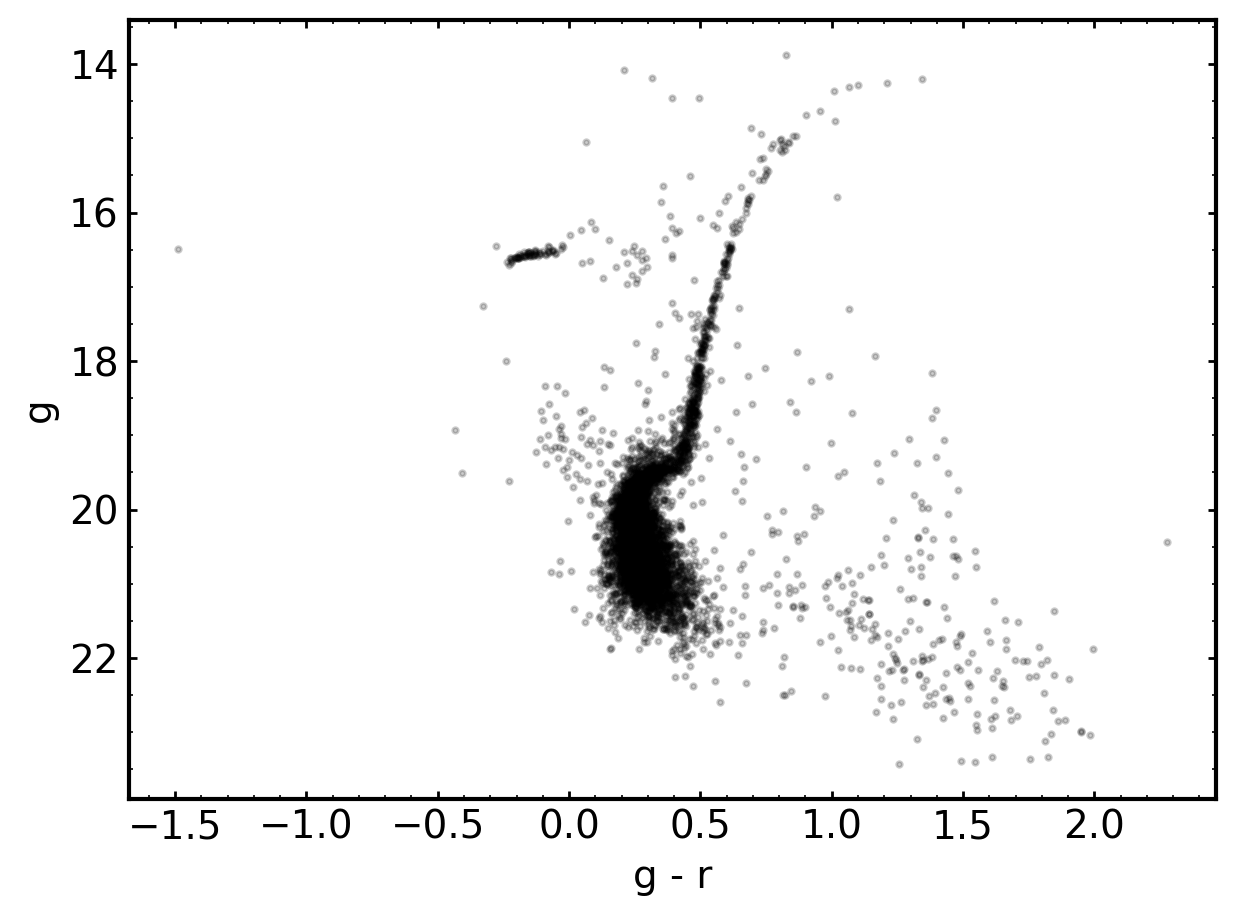

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

nbins = 10

data = pd.read_csv('cluster_18.dat', names=['g', 'r'], sep=' ')

fig, ax = plt.subplots()
x = data.g-data.r
ax.plot(x, data.g, 'o', markersize=2, color='k', alpha=0.2)

fig.gca().invert_yaxis()
ax.set_ylabel('g')
ax.set_xlabel('g - r')

fig.savefig('color-mag.png')

In [45]:
import glob
from copy import deepcopy
isochrones = glob.glob("isochrones/SDSSugriz/*.SDSSugriz")

cleaned_isochrones = []
for isofile in isochrones:
    with open(isofile, 'r') as f:
        data = f.readlines()

    hdr = data[0:6]
    data = data[6:]

    hdr_vals = [val.strip() for val in hdr[3].split(' ') if val not in {'#', ''}]
    mix_len, Y, Z, Zeff, Fe_H, a_Fe = hdr_vals
    
    isochrones_in_this_file = []
    base_iso = dict(
        idx = [],
        M = [],
        LogTeff = [],
        LogG = [],
        LogL = [],
        u = [],
        g = [],
        r = [],
        i = [],
        z = [],
        age = [],
        mix_len = [],
        Y = [],
        Z = [],
        Zeff = [],
        Fe_H = [],
        a_Fe = [],
    )
    iso = deepcopy(base_iso)
    age = None
    
    for j in range(len(data)):
        if data[j] == '\n':
            continue
        
        if '#AGE' in data[j]:
            isochrones_in_this_file.append(pd.DataFrame(iso))

            age = float(data[j].split(" EEPS=")[0].split("AGE=")[1].strip())
            iso = deepcopy(base_iso)
            continue
        
        if '#' == data[j][0]:
            # this line is a header
            continue
            
            
        line = data[j]
        goodline = [val for val in line.strip().split(' ') if len(val) > 0]

        if len(goodline) != 10:
            print(goodline)
            continue 
        
        for val, key in zip(goodline, iso.keys()):
            # if key == 'age': continue
            iso[key].append(val)

        iso['age'].append(age)
        iso['mix_len'].append(mix_len)
        iso['Y'].append(Y)
        iso['Z'].append(Z)
        iso['Zeff'].append(Zeff)
        iso['Fe_H'].append(Fe_H)
        iso['a_Fe'].append(a_Fe)

    cleaned_isochrones += isochrones_in_this_file
    
len(cleaned_isochrones)

2506

In [46]:
cleaned_isochrones[-1]

,idx,M,LogTeff,LogG,LogL,u,g,r,i,z,age,mix_len,Y,Z,Zeff,Fe_H,a_Fe
0,13,0.100991,3.4605,5.1649,-2.9272,18.6578,15.8831,14.3313,12.7322,11.7172,14.5,1.9380,0.3537,6.7081E-02,4.8851E-02,0.57,0.20
1,14,0.118415,3.4668,5.1262,-2.7943,18.1390,15.4336,13.9031,12.3588,11.3777,14.5,1.9380,0.3537,6.7081E-02,4.8851E-02,0.57,0.20
2,15,0.133910,3.4716,5.0947,-2.6902,17.7454,15.0872,13.5740,12.0684,11.1118,14.5,1.9380,0.3537,6.7081E-02,4.8851E-02,0.57,0.20
3,16,0.147429,3.4754,5.0690,-2.6076,17.4384,14.8154,13.3164,11.8392,10.9010,14.5,1.9380,0.3537,6.7081E-02,4.8851E-02,0.57,0.20
4,17,0.160413,3.4787,5.0456,-2.5344,17.1706,14.5773,13.0914,11.6373,10.7143,14.5,1.9380,0.3537,6.7081E-02,4.8851E-02,0.57,0.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,275,0.943466,3.4416,-0.1795,3.3121,4.6123,3.3324,1.3502,-0.6994,-2.2346,14.5,1.9380,0.3537,6.7081E-02,4.8851E-02,0.57,0.20
263,276,0.943468,3.4383,-0.2120,3.3314,4.2942,3.0536,1.0994,-0.9082,-2.4227,14.5,1.9380,0.3537,6.7081E-02,4.8851E-02,0.57,0.20
264,277,0.943470,3.4351,-0.2437,3.3500,4.0038,2.7993,0.8694,-1.1014,-2.5975,14.5,1.9380,0.3537,6.7081E-02,4.8851E-02,0.57,0.20
265,278,0.943472,3.4319,-0.2740,3.3678,3.7784,2.6014,0.6875,-1.2578,-2.7410,14.5,1.9380,0.3537,6.7081E-02,4.8851E-02,0.57,0.20


In [56]:
from scipy.interpolate import interp1d, RegularGridInterpolator, splrep, griddata
import warnings
warnings.filterwarnings("error")

ds = np.linspace(10_000, 20_000, 11)
print(ds)

data = pd.read_csv('cluster_18.dat', names=['g', 'r'], sep=' ')

def M_to_m(M, d=10):
    return M + 5*np.log10(d/10)

nbins = 100
rms_data = {}
xrms_limit = 10
yrms_limit = 10

r_x = np.array([np.min(data.g-data.r), np.max(data.g-data.r)])
r_y = np.array([np.min(data.g), np.max(data.r)])
data_range = np.array([r_x, r_y])

H_data, xbins_data, ybins_data = np.histogram2d(data.g-data.r, data.g, bins=nbins, range=data_range)

for d in ds:
    all_rms = []
    dfs = []
    for df in cleaned_isochrones:
        if len(df) == 0: continue
        if float(list(df.age)[0]) < 9 or float(list(df.age)[0]) > 11: continue
        if float(list(df.Fe_H)[0]) < -3 or float(list(df.Fe_H)[0]) > 0: continue
        df = df[df.g != 'sdss_g']
        
        g = M_to_m(df.g.astype(float), d=d)
        r = M_to_m(df.r.astype(float), d=d)
        
        H_iso, xbins_iso, ybins_iso = np.histogram2d(g-r, r, bins=nbins, range=data_range)

        rms = np.sum((H_data - H_iso)**2 / (H_iso+1))
        
        all_rms.append(rms)
        dfs.append(df)

    rms_data[str(d)] = dfs[np.argmin(all_rms)]

fig.gca().invert_yaxis()
ax.set_ylabel('g')
ax.set_xlabel('g - r')

fig.savefig('color-mag.png')

[10000. 11000. 12000. 13000. 14000. 15000. 16000. 17000. 18000. 19000.
 20000.]


10000.0 9.0 -2.49
11000.0 9.5 -2.49
12000.0 9.5 -1.49
13000.0 10.5 -1.49
14000.0 11.0 -1.00
15000.0 10.5 -1.00
16000.0 10.5 -1.00
17000.0 9.5 -1.00
18000.0 11.0 -1.49
19000.0 9.0 -1.00
20000.0 9.0 -1.00


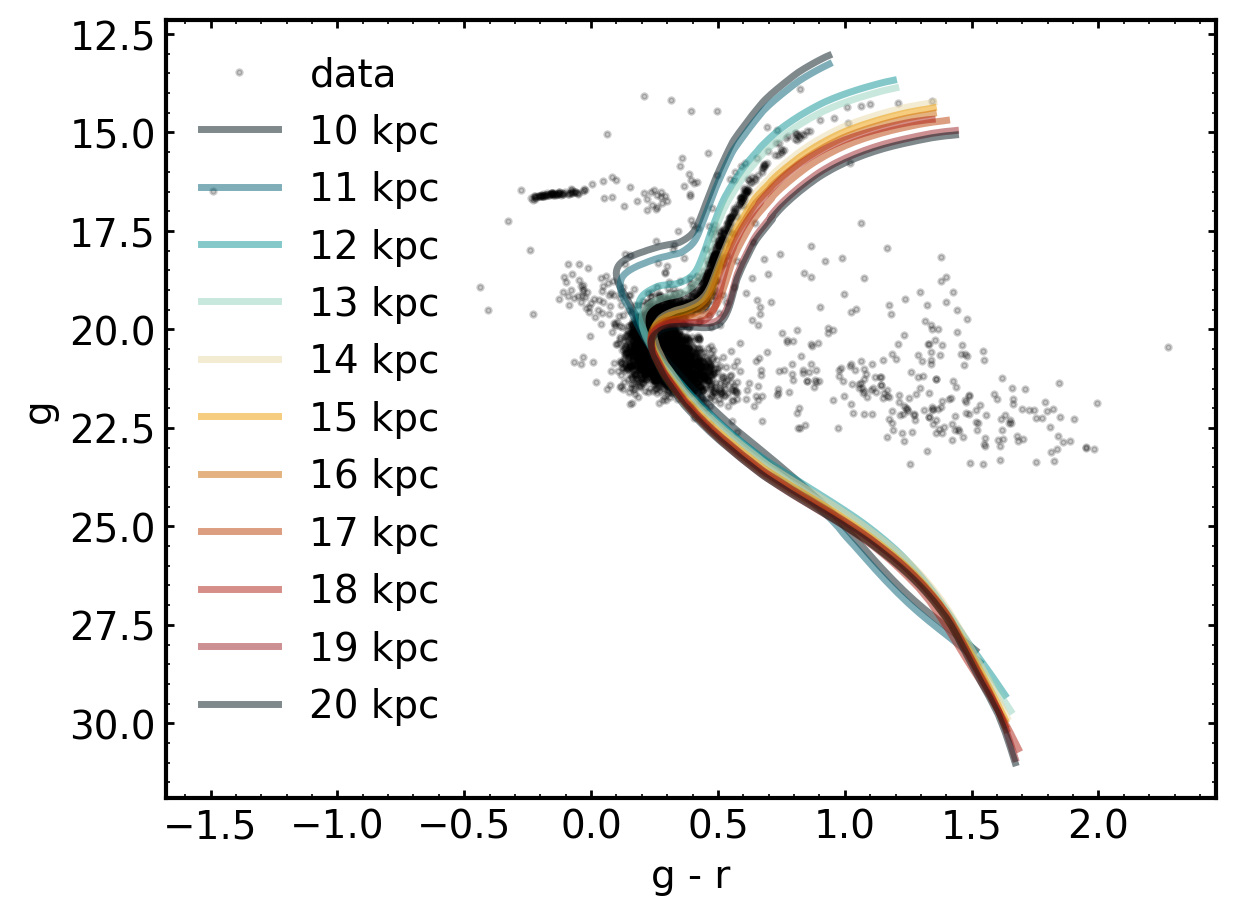

In [57]:
fig, ax = plt.subplots()

data = pd.read_csv('cluster_18.dat', names=['g', 'r'], sep=' ')

x = data.g-data.r
y = data.g
ax.plot(x, y, 'o', markersize=2, color='k', alpha=0.2, label='data')

for d, best_fit in rms_data.items():
    
    best_fit = best_fit[best_fit.g != 'sdss_g']

    print(d, best_fit.age.iloc[0], best_fit.Fe_H.iloc[0])
    
    g = M_to_m(best_fit.g.astype(float), d=float(d))
    r = M_to_m(best_fit.r.astype(float), d=float(d))
    xfit = g - r
    yfit = g

    ax.plot(xfit, yfit, label=f"{int(float(d))//1000} kpc", alpha=0.5)


ax.legend()

fig.gca().invert_yaxis()

ax.set_ylabel('g')
ax.set_xlabel('g - r')

fig.savefig('color-mag.png')

In [36]:
ages = []
fe_h = []
for dd in cleaned_isochrones:
    ages += list(dd.age.unique())
    fe_h += list(dd.Fe_H.unique())

ages = np.unique(ages)
fe_h = np.unique(fe_h)

In [37]:
np.max(np.abs(np.diff(np.sort(ages.astype(float)))))

0.5

In [38]:
np.max(np.abs(np.diff(np.sort(fe_h.astype(float)))))

0.5

In [39]:
fe_h

array(['-0.48', '-0.49', '-0.50', '-0.51', '-0.98', '-0.99', '-1.00',
       '-1.01', '-1.48', '-1.49', '-1.50', '-1.51', '-1.98', '-1.99',
       '-2.00', '-2.01', '-2.48', '-2.49', '-2.50', '-2.51', '-2.99',
       '-3.49', '-3.99', '0.00', '0.01', '0.06', '0.07', '0.08', '0.09',
       '0.21', '0.35', '0.36', '0.37', '0.55', '0.56', '0.57'],
      dtype='<U5')

In [40]:
cleaned_isochrones[1]

,idx,M,LogTeff,LogG,LogL,u,g,r,i,z,age,mix_len,Y,Z,Zeff,Fe_H,a_Fe
0,2,0.109936,3.5445,5.3518,-2.7412,16.9339,13.9181,12.2359,11.5103,11.1010,1.0,1.9380,0.2454,2.5210E-04,5.7459E-05,-2.48,0.80
1,3,0.118614,3.5502,5.3118,-2.6457,16.4928,13.5961,11.9529,11.2659,10.8736,1.0,1.9380,0.2454,2.5210E-04,5.7459E-05,-2.48,0.80
2,4,0.128964,3.5563,5.2693,-2.5423,16.0312,13.2498,11.6502,11.0003,10.6255,1.0,1.9380,0.2454,2.5210E-04,5.7459E-05,-2.48,0.80
3,5,0.144704,3.5645,5.2195,-2.4098,15.4572,12.8073,11.2670,10.6587,10.3050,1.0,1.9380,0.2454,2.5210E-04,5.7459E-05,-2.48,0.80
4,6,0.178431,3.5784,5.1610,-2.2044,14.5794,12.1160,10.6802,10.1279,9.8053,1.0,1.9380,0.2454,2.5210E-04,5.7459E-05,-2.48,0.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,275,1.743957,3.7073,2.0448,2.4173,0.5125,-0.6827,-1.2440,-1.4638,-1.5746,1.0,1.9380,0.2454,2.5210E-04,5.7459E-05,-2.48,0.80
274,276,1.744160,3.7067,2.0301,2.4297,0.4899,-0.7105,-1.2743,-1.4952,-1.6067,1.0,1.9380,0.2454,2.5210E-04,5.7459E-05,-2.48,0.80
275,277,1.744373,3.7061,2.0147,2.4428,0.4659,-0.7399,-1.3061,-1.5281,-1.6405,1.0,1.9380,0.2454,2.5210E-04,5.7459E-05,-2.48,0.80
276,278,1.744571,3.7056,2.0004,2.4549,0.4440,-0.7670,-1.3357,-1.5588,-1.6719,1.0,1.9380,0.2454,2.5210E-04,5.7459E-05,-2.48,0.80


In [41]:
cleaned_isochrones[-5]

,idx,M,LogTeff,LogG,LogL,u,g,r,i,z,age,mix_len,Y,Z,Zeff,Fe_H,a_Fe
0,2,0.100432,3.5447,5.3307,-2.7586,17.5433,13.9244,12.2650,11.5640,11.1820,0.75,1.9380,0.3300,1.5339E-04,1.5339E-04,-2.00,0.00
1,3,0.113858,3.5576,5.2871,-2.6091,16.6758,13.3834,11.8064,11.1750,10.8225,0.75,1.9380,0.3300,1.5339E-04,1.5339E-04,-2.00,0.00
2,4,0.128775,3.5702,5.2438,-2.4620,15.8919,12.8549,11.3687,10.7911,10.4642,0.75,1.9380,0.3300,1.5339E-04,1.5339E-04,-2.00,0.00
3,5,0.151208,3.5835,5.1944,-2.2895,15.0743,12.2565,10.8744,10.3431,10.0399,0.75,1.9380,0.3300,1.5339E-04,1.5339E-04,-2.00,0.00
4,6,0.193798,3.5972,5.1362,-2.0686,14.1113,11.5324,10.2669,9.7765,9.4951,0.75,1.9380,0.3300,1.5339E-04,1.5339E-04,-2.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,275,1.631367,3.7182,2.1950,2.2819,0.7881,-0.4022,-0.9302,-1.1284,-1.2219,0.75,1.9380,0.3300,1.5339E-04,1.5339E-04,-2.00,0.00
274,276,1.631603,3.7176,2.1791,2.2951,0.7641,-0.4317,-0.9626,-1.1620,-1.2564,0.75,1.9380,0.3300,1.5339E-04,1.5339E-04,-2.00,0.00
275,277,1.631821,3.7170,2.1644,2.3075,0.7414,-0.4595,-0.9929,-1.1934,-1.2886,0.75,1.9380,0.3300,1.5339E-04,1.5339E-04,-2.00,0.00
276,278,1.632043,3.7164,2.1503,2.3194,0.7191,-0.4865,-1.0222,-1.2237,-1.3198,0.75,1.9380,0.3300,1.5339E-04,1.5339E-04,-2.00,0.00


# Problem 7

NameError: name 'ax1' is not defined

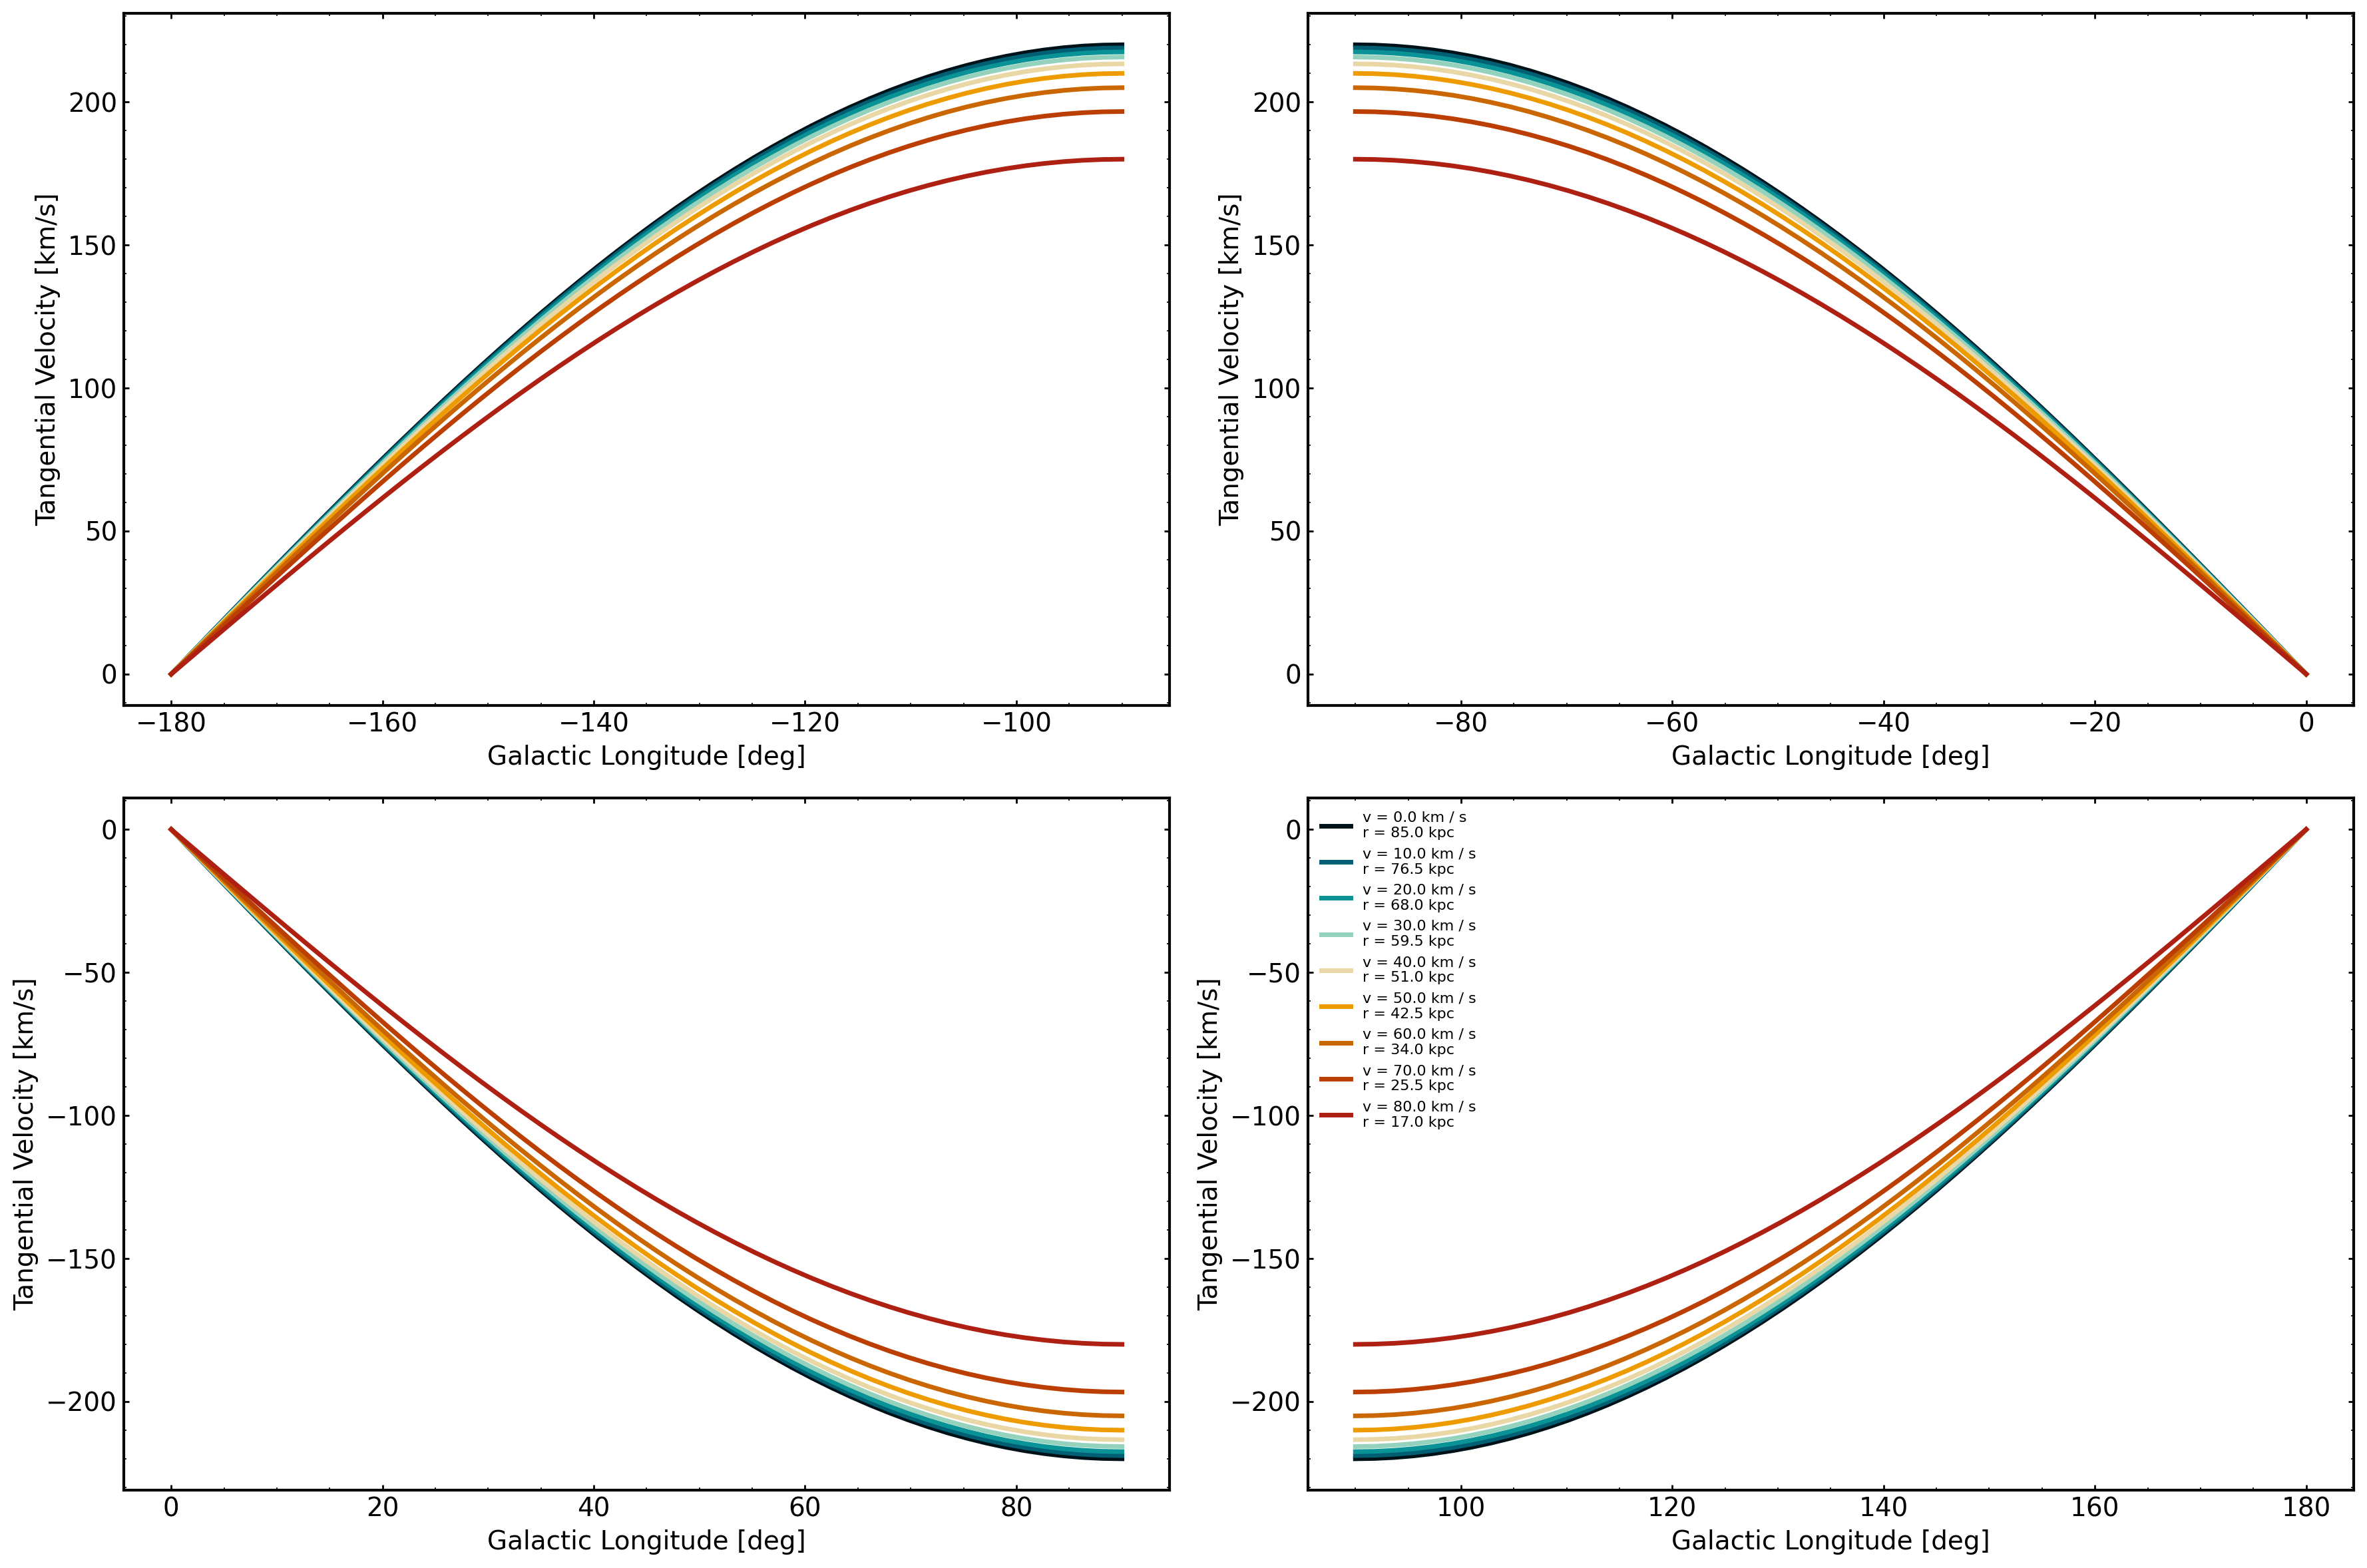

In [42]:
r0 = 8.5*u.kpc
v0 = 220*u.km/u.s

def v_r(ell, r=5*r0, v=1*u.km/u.s, r0=r0, v0=v0):
    return r0*np.sin(ell)*(v/r - v0/r0)

all_ells = [
    (np.linspace(-180, -90) * u.deg).to(u.rad),
    (np.linspace(-90, 0) * u.deg).to(u.rad),
    (np.linspace(0, 90) * u.deg).to(u.rad),
    (np.linspace(90, 180) * u.deg).to(u.rad),
]

fig, axs = plt.subplots(2,2,figsize=(18,12))
for ax, ells in zip(axs.flatten(), all_ells):

    vs = np.linspace(0,80,9)*u.km/u.s
    
    rs = np.linspace(2*r0, 10*r0, 9)
    
    for v,r in zip(vs,reversed(rs)):
        ax.plot(ells.to(u.deg), v_r(ells, v=v, r=r), label=f'v = {v}\nr = {r}')
    
    ax.set_ylabel(r'Tangential Velocity [km/s]')
    ax.set_xlabel(r'Galactic Longitude [deg]')
    
ax.legend(fontsize=8)

ax1.set_ylabel(r'Tangential Velocity [km/s]')
ax1.set_xlabel(r'Galactic Longitude [deg]')

fig.savefig('tangential-velocity.png')

In [ ]:
def v_r(ell, r=1*u.kpc, v=1*u.km/u.s, r0=8.5*u.kpc, v0=220*u.km/u.s):
    return r0*np.sin(ell)*(v/r - v0/r0)

ells = (np.linspace(-180, 180) * u.deg).to(u.rad)
vs = np.linspace(0,60,9)*u.km/u.s
rs = np.linspace(0,1,10)*u.kpc

fig, ax = plt.subplots()
for v in vs:
    ax.plot(ells.to(u.deg), v_r(ells, v=v), label=f'v = {v}')

ax.set_ylabel(r'Tangential Velocity [km/s]')
ax.set_xlabel(r'Galactic Longitude [deg]')

ax.legend(fontsize=8)